In [1]:
# Loading and viewing your data

#download files
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd


# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'

# Save file locally
#urlretrieve(url , 'dob_job_application_filings_subset.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('dob_job_application_filings_subset.csv', low_memory= False)

print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset

df_subset = df.loc[:,['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft','Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories','Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

print(df_subset.head())
print(df_subset.tail())



       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

       ...      Owner's House Number          Owner'sHouse Street Name  \
0      ...              126           EAST 56TH STREET                   
1      ...              107           KNOX PLACE          

In [2]:
#Further diagnosis
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 84 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [3]:
#Calculating summary statistics

df_full = pd.read_csv(url, low_memory=False)
df_full['initial_cost'] = df_full['Initial Cost'].str[1:].astype(float)
df_full['total_est_fee'] = df_full['Total Est. Fee'].str[1:].astype(float)

#This cleaned DataFrame has been pre-loaded as df. Your job is to use the .describe() method on it in the IPython Shell
df = df_full[['Job #', 'Doc #', 'Borough', 'initial_cost', 'total_est_fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories','Proposed No. of Stories', 'Existing Height', 'Proposed Height', 'State', 'Site Fill' ]]

df.describe()


,Job #,Doc #,initial_cost,total_est_fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,2.426788e+08,1.162930,1.803139e+05,2.894909e+03,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,1.312507e+08,0.514937,7.961524e+06,1.213534e+05,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216206e+08,1.000000,0.000000e+00,2.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,2.202645e+08,1.000000,1.597500e+04,4.195000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,3.208652e+08,1.000000,6.790500e+04,9.297000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,5.400246e+08,9.000000,9.003000e+08,1.014000e+07,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


In [4]:
#Frequency counts for categorical data
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
MD        7
DC        7
GA        6
MA        6
KS        6
VA        5
CO        4
SC        3
AZ        3
WI        3
MN        3
NC        2
RI        2
UT        2
NM        1
VT        1
WA        1
IN        1
MI        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


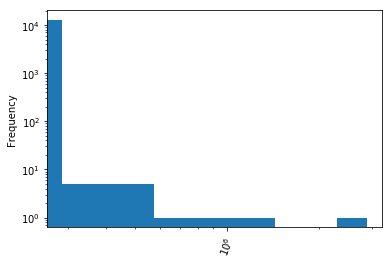

In [5]:
#Visual exploratory data analysis
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot('hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()





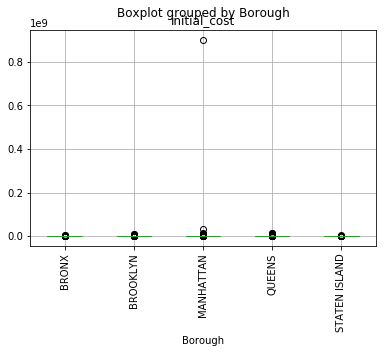

In [6]:
#Visualizing multiple variables with boxplots
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()


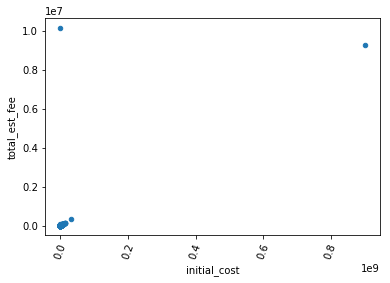

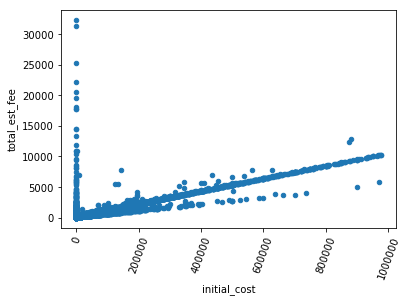

In [7]:
#Visualizing multiple variables with scatter plots
import pandas as pd
import matplotlib.pyplot as plt
dat = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'
df = pd.read_csv(dat, low_memory= False)
df['initial_cost'] = df['Initial Cost'].str[1:].astype(float)
df['total_est_fee'] = df['Total Est. Fee'].str[1:].astype(float)
#df.to_csv('dob_job_application_filings_subset.csv', index=False)
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]
df_subset = df.loc[(df.initial_cost < 1000000) & (df.total_est_fee < 100000), :]

# Import necessary modules\nimport pandas as pd\n
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()
# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

In [8]:
#===============>Tidy data
#pre_code

import pandas as pd
#examples
tidy_example = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/tidy_example.csv')
tidy_example_melt = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/tidy_example_melt.csv')
#tidy_example.to_csv('tidy_example.csv', index=False)
#tidy_example_melt.to_csv('tidy_example_melt.csv', index=False)

#airquality 
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/airquality.csv')
#df.to_csv('airquality.csv', index=False)
airquality = pd.read_csv('airquality.csv')
airquality_melt = pd.melt(df, id_vars=['Month', 'Day'], value_vars=['Ozone', 'Solar.R', 'Wind', 'Temp'])
df1 = airquality
df2 = airquality_melt


In [9]:
#Reshaping your data using melt

#Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(df, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


In [10]:
# Customizing melted data

# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(df, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


In [11]:
#Pivot data

# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [12]:
#Resetting the index of a DataFrame

# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the new index of airquality_pivot
print(airquality_pivot.index)

# Print the head of airquality_pivot
print(airquality_pivot.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [13]:
#Pivoting duplicate values

import numpy as np

airquality_dup = pd.concat([airquality_melt, airquality_melt])

# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [14]:
#Splitting a column with .str
import pandas as pd
df_tb = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/tb.csv')
#df_tb.to_csv('tb.csv', index=False)
tb = pd.read_csv('tb.csv')

# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] =  tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


In [15]:
#Splitting a column with .split() and .get()

import pandas as pd
df_ebola = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/ebola.csv')
#df_ebola.to_csv('ebola.csv', index=False)
ebola = pd.read_csv('ebola.csv')
#---------------------------------------------------------

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())



         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


In [16]:
#=====================>Concatenating data

import pandas as pd
df_uber1 = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/uber-raw-data-2014_04.csv')
#df_uber1.to_csv('uber-raw-data-2014_04.csv', index=False)
df_uber2 = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/uber-raw-data-2014_05.csv')
#df_uber2.to_csv('uber-raw-data-2014_05.csv', index=False)
df_uber3 = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/uber-raw-data-2014_06.csv')
#df_uber3.to_csv('uber-raw-data-2014_06.csv', index=False)

uber1 = pd.read_csv('uber-raw-data-2014_04.csv')
uber2 = pd.read_csv('uber-raw-data-2014_05.csv')
uber3 = pd.read_csv('uber-raw-data-2014_06.csv')



In [17]:
#Combining rows of data
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())


(297, 4)
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [18]:
#Combining columns of data

ebola = pd.read_csv('ebola.csv')
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='status_country', value_name='counts')

status_country = ebola_melt.status_country.str.split('_', expand=True)
status_country.columns = ['status', 'country']
print(ebola_melt.head())
print(status_country.head())
#-----------------------------------------------------------

# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())



         Date  Day status_country  counts
0    1/5/2015  289   Cases_Guinea  2776.0
1    1/4/2015  288   Cases_Guinea  2775.0
2    1/3/2015  287   Cases_Guinea  2769.0
3    1/2/2015  286   Cases_Guinea     NaN
4  12/31/2014  284   Cases_Guinea  2730.0
  status country
0  Cases  Guinea
1  Cases  Guinea
2  Cases  Guinea
3  Cases  Guinea
4  Cases  Guinea
(1952, 6)
         Date  Day status_country  counts status country
0    1/5/2015  289   Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288   Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287   Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286   Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284   Cases_Guinea  2730.0  Cases  Guinea


In [19]:
#Finding files that match a pattern

# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = 'uber-raw-data-2014_0?.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())



['uber-raw-data-2014_04.csv', 'uber-raw-data-2014_05.csv', 'uber-raw-data-2014_06.csv']
          Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4  5/1/2014 0:17:00  40.7594 -73.9734  B02512


In [20]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

(297, 4)
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [21]:
#1-to-1 data merge

import pandas as pd
s = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/survey_site.csv')
v = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/survey_visited.csv')
v = v.loc[[0, 2, 6]]
#s.to_csv('site.csv', index=False)
#v.to_csv('visited_partial.csv', index=False)
site = pd.read_csv('site.csv')
visited = pd.read_csv('visited_partial.csv')
#--------------------------------------
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
print(o2o)




    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [22]:
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [23]:
import pandas as pd
s = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/survey_site.csv')
v = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/survey_visited.csv')
sv = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/survey_survey.csv')
#s.to_csv('site.csv', index=False)
#v.to_csv('visited.csv', index=False)
#sv.to_csv('survey.csv', index=False)
# site survey visited
site = pd.read_csv('site.csv')
visited = pd.read_csv('visited.csv')
survey = pd.read_csv('survey.csv')
df1 = pd.DataFrame({'c1': ['a', 'a', 'b', 'b'], 'c2': [1, 2, 3, 4]})
df2 = pd.DataFrame({'c1': ['a', 'a', 'b', 'b'], 'c2': [10, 20, 30, 40]})
df3 = pd.merge(df1, df2, on='c1')
print(df1)
print(df2)
print(df3)
#--------------------------------------

# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))






  c1  c2
0  a   1
1  a   2
2  b   3
3  b   4
  c1  c2
0  a  10
1  a  20
2  b  30
3  b  40
  c1  c2_x  c2_y
0  a     1    10
1  a     1    20
2  a     2    10
3  a     2    20
4  b     3    30
5  b     3    40
6  b     4    30
7  b     4    40
     name    lat    long  ident   site       dated  taken person quant  \
0    DR-1 -49.85 -128.57    619   DR-1  1927-02-08    619   dyer   rad   
1    DR-1 -49.85 -128.57    619   DR-1  1927-02-08    619   dyer   sal   
2    DR-1 -49.85 -128.57    622   DR-1  1927-02-10    622   dyer   rad   
3    DR-1 -49.85 -128.57    622   DR-1  1927-02-10    622   dyer   sal   
4    DR-1 -49.85 -128.57    844   DR-1  1932-03-22    844    roe   rad   
5    DR-3 -47.15 -126.72    734   DR-3  1939-01-07    734     pb   rad   
6    DR-3 -47.15 -126.72    734   DR-3  1939-01-07    734   lake   sal   
7    DR-3 -47.15 -126.72    734   DR-3  1939-01-07    734     pb  temp   
8    DR-3 -47.15 -126.72    735   DR-3  1930-01-12    735     pb   rad   
9    DR-3 -47.15 

In [24]:
#===================>Data Types
import pandas as pd
df_tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/799924f46906146ad36b8b1c27d83e51dd8b411a/tips.csv')
#df_tips.to_csv('tips.csv', index=False)
tips = pd.read_csv('tips.csv')

In [25]:
#Converting data types

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
df = sns.load_dataset('tips')
df.ix[np.random.permutation(len(df))[:42], 'total_bill'] = 'missing'
df.ix[np.random.permutation(len(df))[:24], 'tip'] = 'missing'
df.ix[np.random.permutation(len(df))[:10], 'sex'] = np.NaN
df.ix[np.random.permutation(len(df))[:15], 'smoker'] = np.NaN
df.ix[np.random.permutation(len(df))[:1], 'day'] = np.NaN
df.ix[np.random.permutation(len(df))[:17], 'time'] = np.NaN
df.ix[np.random.permutation(len(df))[:13], 'size'] = np.NaN
df.sex = df.sex.cat.add_categories(['missing'])
df.smoker = df.smoker.cat.add_categories(['missing'])
df.day = df.day.cat.add_categories(['missing'])
df.time = df.time.cat.add_categories(['missing'])
df.fillna('missing')
#df.to_csv('tips_nan.csv', index=False)
tips = df
#-------------------------------------------------------------

# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    202 non-null float64
tip           220 non-null float64
sex           234 non-null category
smoker        229 non-null category
day           243 non-null category
time          227 non-null category
size          231 non-null float64
dtypes: category(4), float64(3)
memory usage: 7.2 KB
None


C:\Users\Data4thinking\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [27]:
#String parsing with regular expressions
# Import the regular expression module
import re 

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')


# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result = prog.match('1123-456-7890')
print(bool(result))

True
False


In [28]:
#Extracting numerical values from strings
# Import the regular expression module
import re 

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


In [29]:
#Pattern matching
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d{3}\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w', string='Australia'))
print(pattern3)



True
True
True


In [30]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  sex_recode
0       16.99  1.01  Female     No  Sun  Dinner   2.0         0.0
1       10.34  1.66    Male     No  Sun  Dinner   NaN         1.0
2         NaN  3.50    Male     No  Sun  Dinner   3.0         1.0
3       23.68   NaN    Male     No  Sun  Dinner   2.0         1.0
4       24.59  3.61  Female     No  Sun  Dinner   4.0         0.0


In [31]:
#=============>Dropping duplicate data

df_bill = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/billboard.csv')
#df_bill.to_csv('billboard.csv', index=False)
df_long = pd.melt(df_bill, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rank')
#df_long.to_csv('billboard_long.csv', index=False)
billboard = pd.read_csv('billboard_long.csv')
#--------------------------------------------------
# Create the new DataFrame: tracks
tracks = billboard[['year','artist','track','time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 4 columns):
year      24092 non-null int64
artist    24092 non-null object
track     24092 non-null object
time      24092 non-null object
dtypes: int64(1), object(3)
memory usage: 753.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
year      317 non-null int64
artist    317 non-null object
track     317 non-null object
time      317 non-null object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


In [32]:
#Filling missing data
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


In [33]:
#all na convert a 0
ebola = ebola.fillna(0)

#Testing your data with asserts
import pandas as pd 

# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

# Assert that all values are >= 0
assert (ebola >=0).all().all()


In [34]:
#========================>  Put all together

import pandas as pd
df_le1= pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/g1800.csv')
df_le2= pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/g1900.csv')    
df_le3 = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/g2000.csv')

#df_le1.to_csv('g1800.csv', index=False)
g1800s = pd.read_csv('g1800.csv', encoding = "ISO-8859-1")

#df_le2.to_csv('g1900.csv', index=False)
g1900s = pd.read_csv('g1900.csv', encoding = "ISO-8859-1")

#df_le3.to_csv('g2000.csv', index=False)
g2000s = pd.read_csv('g2000.csv', encoding = "ISO-8859-1")



In [35]:
#Exploratory analysis

print(g1800s.head())
print(g1800s.info())
print(g1800s.describe())
print(g1800s.columns)
print(g1800s.shape)


         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...     1890   1891   1892   1893   1894   1895   1896  \
0    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.14  28.13  ...    27.29  27.28  27.27  27.26  27.25  27.24  27.23   
2    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  ...    35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  ...    28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1897   1898   1899  
0    NaN    NaN    NaN  
1  27.22  27.21  27.20  
2    NaN   

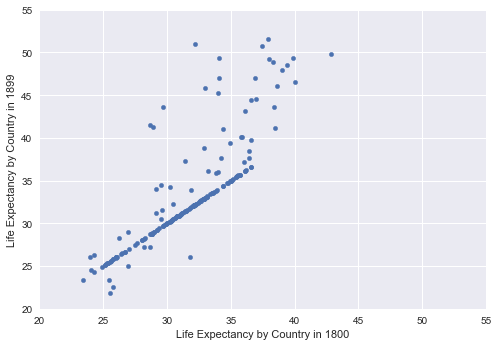

In [36]:
#Visualizing your data

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


In [37]:
#Thinking about the question at hand

def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [38]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s])      #pass arg as list 

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


(780, 218)
    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN        

In [39]:
#Reshaping your data
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [40]:
#Checking the data types

# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

In [41]:
#Looking at country spellings

# Create the series of countries: countries
countries = gapminder_melt.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


In [42]:
#More data cleaning and processing

# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder = gapminder_melt.dropna()

# Print the shape of gapminder
print(gapminder.shape)


(43857, 3)


year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


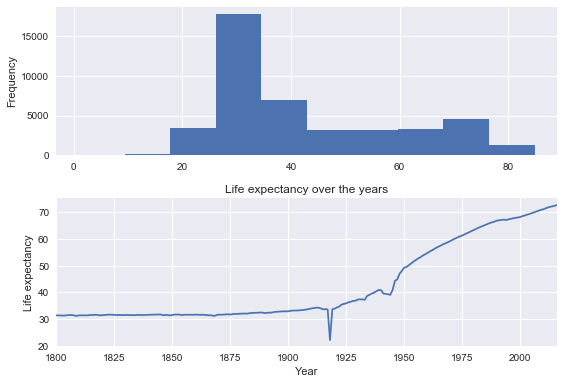

In [43]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_melt.to_csv('gapminder_clean.csv')
gapminder_agg.to_csv('gapminder_agg_c_mean.csv')
